In [1]:

from dwdynamics import ComplexDynamicsProblem, Objective,helpers,fixed_point,instance # Difference a. We are using ComplexDynamicsProblem
from dimod import ExactSolver
import numpy as np
import scipy
import pandas as pd
import numpy as np
import scipy as sp
import math
import qutip as qp
import dimod
import pandas as pd
from collections import defaultdict
import re
from dwave.system import DWaveSampler, EmbeddingComposite, TilingComposite,ParallelEmbeddingComposite
import dwave.inspector
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx

In [2]:

H = np.array([
    [0,             0,  0,  0],
    [0,      0,         0,         -0.5j],
    [0,      0,         0,        0.5j],
    [0,             0.5j, -0.5,  0]
], dtype=complex)

H = np.array([
    [-0.5+0.j,   -0.-0.5j,  0.+0.j,    0.5+0.5j],
    [-0.+0.5j,   0.5+0.j,   0.5+0.5j,  0.+0.j ],
    [ 0.-0.j,    0.5-0.5j, -0.5+0.j,  -0.-0.5j],
    [ 0.5-0.5j,  0.-0.j,  -0.+0.5j,   0.5+0.j ]
], dtype=complex)
H = np.pi/3*1/np.sqrt(3)*np.matrix([[1,1-1j],[1+1j,-1]])

np.linalg.eig(H)

EigResult(eigenvalues=array([ 1.04719755+2.18628921e-17j, -1.04719755-1.32885195e-16j]), eigenvectors=matrix([[ 0.88807383+0.j        , -0.32505758+0.32505758j],
        [ 0.32505758+0.32505758j,  0.88807383+0.j        ]]))

In [3]:
qubo.num_variables

NameError: name 'qubo' is not defined

In [ ]:
helpers.result_string_to_dict('111000')

{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0}

0.24999999999999745
0.12499999999999956
0.24999999999999623
0.24999999999999634
0.24999999999999678
0.24999999999999756
0.2499999999999981
0.24999999999999678
0.249999999999998
0.24999999999999745
0.374999999999996
0.24999999999999722
0.12499999999999856
0.249999999999999
0.2499999999999981
0.24999999999999922


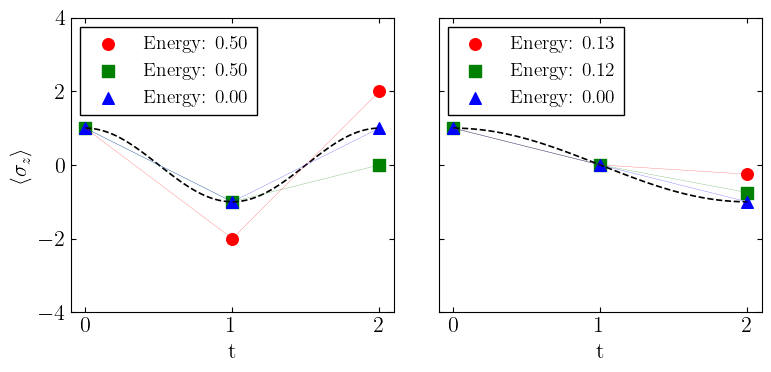

In [ ]:
helpers.set_pub_style(fontsize=16,grid=False)
times = np.linspace(0, len(problem.times)-1, 100)

# Define sigma_z for manual computation of expected values

SZ = np.array([[1, 0], [0, -1]])
colors = ["r", "g", "b", "c", "m", "y", "k"]
markers = ["o", "s", "^", "D", "v", "<", ">"]
fig, axis = plt.subplots(1,2,figsize=(8, 4),sharey=True)
axis = axis.flatten()
system = 3
tp = 3
prec = [2,3]
for j,system in enumerate([1,3]):
    i = instance.Instance(system)

    i.create_instance(precision=prec[j],number_time_points=tp)
    qubo = i.problem.qubo(objective=Objective.hessian)
    problem = i.problem
    baseline = qp.mesolve(qp.Qobj(problem.hamiltonian), qp.Qobj(problem.initial_state), times, e_ops=[qp.sigmaz()]).expect[0]
    ax = axis[j]
    ax.plot(times, baseline, "k--")
    dw_result = helpers.get_dwave_sample_set(system,timepoints=3)

    for idx,sample in enumerate(list(dw_result.samples(3))[::-1]):
        dw_vec = problem.interpret_sample(sample)
        dw_expect = [(state.conj() @ SZ @ state).real for state in dw_vec]
        energy = list(dw_result.to_pandas_dataframe()[0:3][::-1]['energy'])[idx]

        #axis.scatter(inst_obj.problem.times, exact_expect, marker="^", lw=2, s=300, edgecolors="b", facecolors="none", label="Exact solver")
        #axis.scatter(problem.times, sa_expect, marker="o", lw=2, s=100, edgecolors="r", facecolors="none", label="SA sampler")
        ax.scatter(problem.times, dw_expect,color=colors[idx % len(colors)], marker=markers[idx % len(markers)],label=f"Energy: {abs(energy):.2f}",s=70)
        ax.plot(problem.times, dw_expect, color=colors[idx % len(colors)], alpha=0.5, linewidth=0.3)
        ax.set_xlabel("t")
        ax.legend(loc='upper left',fontsize=14)


axis[0].set_ylabel(r"$\langle \sigma_z \rangle$")
plt.ylim(-4,4)
plt.tight_layout(w_pad=2)
plt.savefig(f'../plots/dynamics_system_list.pdf' ,bbox_inches='tight')
plt.show()

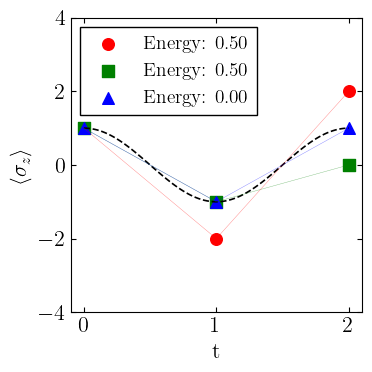

0.24999999999999745
0.12499999999999956
0.24999999999999623
0.24999999999999634
0.24999999999999678
0.24999999999999756
0.2499999999999981
0.24999999999999678
0.249999999999998
0.24999999999999745
0.374999999999996
0.24999999999999722
0.12499999999999856
0.249999999999999
0.2499999999999981
0.24999999999999922


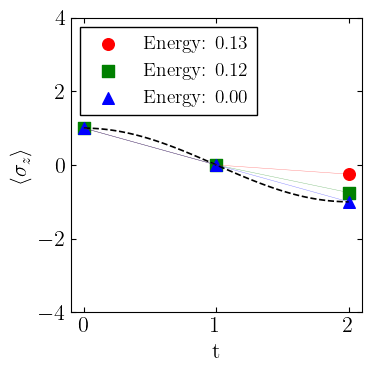

In [ ]:
helpers.set_pub_style(fontsize=16,grid=False)

# Define sigma_z for manual computation of expected values

SZ = np.array([[1, 0], [0, -1]])
colors = ["r", "g", "b", "c", "m", "y", "k"]
markers = ["o", "s", "^", "D", "v", "<", ">"]
system = 3
tp = 3
prec = [2,3]
for j,system in enumerate([1,3]):
    fig, ax = plt.subplots(1,1,figsize=(4, 4))

    i = instance.Instance(system)

    i.create_instance(precision=prec[j],number_time_points=tp)
    qubo = i.problem.qubo(objective=Objective.hessian)
    problem = i.problem
    times = np.linspace(0, len(problem.times)-1, 100)

    baseline = qp.mesolve(qp.Qobj(problem.hamiltonian), qp.Qobj(problem.initial_state), times, e_ops=[qp.sigmaz()]).expect[0]
    ax.plot(times, baseline, "k--")
    dw_result = helpers.get_dwave_sample_set(system,timepoints=3)

    for idx,sample in enumerate(list(dw_result.samples(3))[::-1]):
        dw_vec = problem.interpret_sample(sample)
        dw_expect = [(state.conj() @ SZ @ state).real for state in dw_vec]
        energy = list(dw_result.to_pandas_dataframe()[0:3][::-1]['energy'])[idx]

        #axis.scatter(inst_obj.problem.times, exact_expect, marker="^", lw=2, s=300, edgecolors="b", facecolors="none", label="Exact solver")
        #axis.scatter(problem.times, sa_expect, marker="o", lw=2, s=100, edgecolors="r", facecolors="none", label="SA sampler")
        ax.scatter(problem.times, dw_expect,color=colors[idx % len(colors)], marker=markers[idx % len(markers)],label=f"Energy: {abs(energy):.2f}",s=70)
        ax.plot(problem.times, dw_expect, color=colors[idx % len(colors)], alpha=0.5, linewidth=0.3)
        ax.set_xlabel("t")
        ax.legend(loc='upper left',fontsize=14)


        ax.set_ylabel(r"$\langle \sigma_z \rangle$")
    plt.ylim(-4,4)
    plt.tight_layout(w_pad=2)
    plt.savefig(f'../plots/dynamics_system_{system}_list.pdf' ,bbox_inches='tight')
    plt.show()

In [ ]:
df = i.get_xubo_df()

for _,(energy,state) in df.head(10).iterrows():
    print(energy)
    sample_vec = i.problem.interpret_sample(helpers.result_string_to_dict(state))
    print(sample_vec)
    exact_expect = [(state.conj() @ SZ @ state).real for state in sample_vec]
    print(exact_expect)
    print("---------")

    

-42.0
[[1.+0.j 1.+1.j]
 [1.+1.j 1.+0.j]]
[np.float64(-1.0), np.float64(1.0)]
---------
-41.0
[[1.-1.j 1.+1.j]
 [1.+1.j 1.+1.j]]
[np.float64(0.0), np.float64(0.0)]
---------
-41.0
[[1.+1.j 1.+1.j]
 [1.+1.j 1.+1.j]]
[np.float64(0.0), np.float64(0.0)]
---------
-41.0
[[ 1.+0.j -1.+1.j]
 [ 0.+1.j  1.+0.j]]
[np.float64(-1.0), np.float64(0.0)]
---------
-41.0
[[ 1.+0.j  0.+1.j]
 [-1.+1.j  1.+0.j]]
[np.float64(0.0), np.float64(1.0)]
---------
-41.0
[[1.+0.j 1.-1.j]
 [1.+0.j 1.+0.j]]
[np.float64(-1.0), np.float64(0.0)]
---------
-41.0
[[1.+0.j 1.+0.j]
 [1.-1.j 1.+0.j]]
[np.float64(0.0), np.float64(1.0)]
---------
-41.0
[[-1.+0.j  1.+1.j]
 [ 1.+1.j -1.+0.j]]
[np.float64(-1.0), np.float64(1.0)]
---------
-41.0
[[0.+0.j 1.+1.j]
 [1.+1.j 0.+0.j]]
[np.float64(-2.0), np.float64(2.0)]
---------
-41.0
[[2.+0.j 1.+1.j]
 [1.+1.j 0.+0.j]]
[np.float64(2.0), np.float64(2.0)]
---------


In [ ]:
state = 1/math.sqrt(2) * np.array([1,1])
print(state)
state= np.array([3/5,4/5])
(state.conj() @ SZ @ state).real

[0.70710678 0.70710678]


np.float64(-0.28000000000000014)

# Analyze Velox results

In [ ]:
system=3
df = pd.read_csv(f'../data/results/hessian/{system}/new_best_results_hessian_{system}_native.csv')
df

,type,instance,num_var,NUM_SHOTS,num_rep,num_steps,compress,runtime,gpu_runtime,gap,best_energy,gnd_energy,success_prob,best_solution
0,3,precision_3_timepoints_2.coo,24,20,1024,10,True,0.000977,0.000406,1.030928e+00,-12.000,-12.125,0.0,1;-1;-1;-1;1;-1;-1;1;-1;-1;1;-1;-1;-1;1;-1;1;-...
1,3,precision_3_timepoints_3.coo,36,20,1024,10,True,0.000998,0.000389,3.012048e+00,-20.125,-20.750,0.0,-1;1;1;-1;1;-1;-1;1;1;-1;1;1;-1;-1;1;-1;1;1;-1...
2,3,precision_3_timepoints_4.coo,48,20,1024,10,True,0.001306,0.000694,3.829787e+00,-28.250,-29.375,0.0,-1;1;1;-1;1;-1;-1;1;-1;-1;-1;1;-1;-1;1;-1;1;1;...
3,3,precision_3_timepoints_5.coo,60,20,1024,10,True,0.001005,0.000366,4.605263e+00,-36.250,-38.000,0.0,-1;1;1;-1;1;-1;-1;1;-1;-1;-1;1;-1;-1;-1;-1;1;1...
4,3,precision_3_timepoints_2.coo,24,20,1024,20,True,0.001475,0.000908,1.030928e+00,-12.000,-12.125,0.0,1;-1;-1;-1;1;-1;-1;1;-1;-1;1;-1;-1;-1;1;-1;1;1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,3,precision_3_timepoints_5.coo,60,20,1024,9000,True,0.339232,0.319060,1.869849e-14,-38.000,-38.000,1.0,1;-1;-1;-1;1;-1;-1;1;-1;-1;1;-1;-1;-1;1;-1;1;1...
108,3,precision_3_timepoints_2.coo,24,20,1024,10000,True,0.416618,0.398095,1.465037e-14,-12.125,-12.125,1.0,1;-1;-1;-1;1;-1;-1;1;-1;-1;1;-1;-1;-1;1;-1;1;1...
109,3,precision_3_timepoints_3.coo,36,20,1024,10000,True,0.452270,0.441228,0.000000e+00,-20.750,-20.750,1.0,1;-1;-1;-1;1;-1;-1;1;-1;-1;1;-1;-1;-1;1;-1;1;1...
110,3,precision_3_timepoints_4.coo,48,20,1024,10000,True,0.350235,0.348330,1.209434e-14,-29.375,-29.375,1.0,1;-1;-1;-1;1;-1;-1;1;-1;-1;1;-1;-1;-1;1;-1;1;1...


In [ ]:
df_dict= defaultdict(list)
for row in df.itertuples():
    precision, timepoints = re.findall(r'\d+',str(row.instance))
    df_dict['precision'].append(int(precision))
    df_dict['timepoints'].append(int(timepoints))
    df_dict['runtime'].append(float(row.runtime))
    df_dict['gap'].append(float(row.gap))
    df_dict['success_prob'].append(float(row.success_prob))
    df_dict['solution'].append(row.best_solution.replace("-1","0").replace(';',''))
df_cleaned = pd.DataFrame(df_dict).sort_values('gap',ascending=True).drop_duplicates()
df_cleaned

,precision,timepoints,runtime,gap,success_prob,solution
49,3,3,0.014966,0.000000,0.45,100010010010001011011001010010010100
53,3,3,0.018198,0.000000,0.70,100010010010001011011001010010010100
61,3,3,0.026268,0.000000,1.00,100010010010001011011001010010010100
57,3,3,0.022203,0.000000,1.00,100010010010001011011001010010010100
45,3,3,0.010844,0.000000,0.15,100010010010001011011001010010010100
...,...,...,...,...,...,...
1,3,3,0.000998,3.012048,0.00,011010011011001011001001011000011011
10,3,4,0.001907,3.404255,0.00,100010001011001011011001010001011011001010001010
2,3,4,0.001306,3.829787,0.00,011010010001001011011010010000000011100010001000
6,3,4,0.001315,4.255319,0.00,011011011010001010010010010010010001010001010011


In [ ]:
precision = 3
timepoints = 2

df_filtered =  df_cleaned[(df_cleaned.precision == precision) & (df_cleaned.timepoints == timepoints)]
df_filtered

,precision,timepoints,runtime,gap,success_prob,solution
60,3,2,0.461294,1.465037e-14,1.0,100010010010001011011001
56,3,2,0.039619,1.465037e-14,1.0,100010010010001011011001
52,3,2,0.298709,1.465037e-14,1.0,100010010010001011011001
48,3,2,0.031612,1.465037e-14,1.0,100010010010001011011001
28,3,2,0.345227,1.465037e-14,1.0,100010010010001011011001
24,3,2,0.041125,1.465037e-14,1.0,100010010010001011011001
16,3,2,0.036910,1.465037e-14,1.0,100010010010001011011001
20,3,2,0.339338,1.465037e-14,1.0,100010010010001011011001
12,3,2,0.327044,1.465037e-14,1.0,100010010010001011011001
8,3,2,0.034989,1.465037e-14,0.8,100010010010001011011001


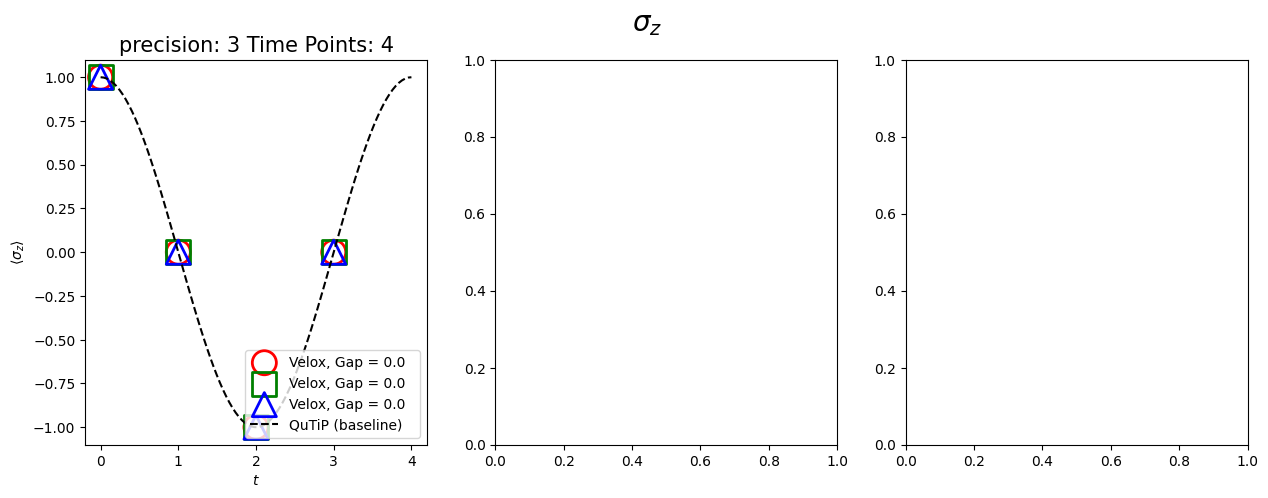

In [ ]:

# Loop over all rows in velox_results and plot all dynamics on the same panel,
# coloring each curve according to its best_energy.
colors = ["r", "g", "b", "c", "m", "y", "k"]
markers = ["o", "s", "^", "D", "v", "<", ">"]

plot_rows =  1
plot_columns = 3
# Create a single axis for the plot
fig, axes = plt.subplots(plot_rows, plot_columns, figsize=(5*plot_columns, 5*plot_rows), sharey=False)

SZ = np.array([[1, 0], [0, -1]])  
axes = axes.flatten()
tp_pairs = [(3,4)]

for i, (precision,timepoints) in enumerate(tp_pairs):
    ax = axes[i]

    inst_obj = instance.Instance(system)

    inst_obj.create_instance(precision=precision,number_time_points=timepoints)
    qubo = inst_obj.get_qubo()


    df_filtered =  df_cleaned[(df_cleaned.precision == precision) & (df_cleaned.timepoints == timepoints)]
    for j in [0,1,2]:
        raw_sample = df_filtered['solution'].values[j]
        gap = round(df_filtered['gap'].values[j],ndigits=2)
        sample_str = helpers.result_string_to_dict(raw_sample)
        sample_vec = inst_obj.problem.interpret_sample(sample_str)
        exact_expect = [(state.conj() @ SZ @ state).real for state in sample_vec]
        ax.scatter(inst_obj.problem.times, exact_expect, color=colors[j % len(colors)], marker=markers[j % len(markers)], lw=2, s=300, facecolors="none", label=f"Velox, Gap = {gap}  ")


    psi_0 = qp.basis(2, 0)

    times = np.linspace(0, 4, 100)
    baseline = qp.mesolve(qp.Qobj(inst_obj.H), psi_0, times, e_ops=[qp.sigmaz()]).expect[0]
     

    # Difference d.: We use complex conjugation to compute expected values. For this example it shouldn't matter though.
    # Then, for the expectation values we take only the real part, because otherwise matplotlib would complain.
    ax.plot(times, baseline, "k--", label="QuTiP (baseline)")
    ax.set_title(f"precision: {precision} Time Points: {timepoints}",fontsize=15)

    ax.set_ylabel(r"$\langle \sigma_z \rangle$")
    ax.set_xlabel("$t$")
    ax.legend(loc="lower right")
fig.suptitle(r"$\sigma_z$",fontsize=20)
plt.show()

array([[ 2.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         1.00000000e+00-1.06919569e-16j,  1.18862148e-32-1.09023919e-16j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  2.00000000e+00+0.00000000e+00j,
        -0.00000000e+00-1.06919569e-16j,  1.00000000e+00+1.09023919e-16j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 1.00000000e+00+1.06919569e-16j, -0.00000000e+00+1.06919569e-16j,
         2.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         1.00000000e+00-1.06919569e-16j,  1.18862148e-32-1.09023919e-16j,
         0.00000000e+00+0.00000000e+

In [ ]:
system =2
inst_obj = instance.Instance(system)

inst_obj.create_instance(precision=2,number_time_points=4)
qubo = inst_obj.get_qubo()

inst_obj.problem.get_clock()
dw_sampler = EmbeddingComposite(DWaveSampler(solver="Advantage2_system1.4"))

dw_result = dw_sampler.sample(qubo, num_reads=1, annealing_time=200,return_embedding=True)
dwave.inspector.show(dw_result)

SolverFailureError: Problem not accepted because user has insufficient remaining solver access time in project julr

In [ ]:
dw_result.info['embedding_context']


{'embedding': {1: (3952,),
  0: (872,),
  8: (883,),
  9: (3940,),
  3: (1980,),
  2: (1968,),
  10: (2565,),
  11: (2554,),
  5: (461,),
  4: (3362,),
  12: (472,),
  13: (3373,),
  7: (3659,),
  6: (2286,),
  14: (2298,),
  15: (3671,)},
 'chain_break_method': 'majority_vote',
 'embedding_parameters': {},
 'chain_strength': 1.676797729304283}

In [ ]:
times = np.linspace(0, inst_obj.number_time_points, 100)
baseline = qp.mesolve(qp.Qobj(inst_obj.H), qp.Qobj(inst_obj.psi0), times, e_ops=[qp.sigmaz()]).expect[0]

# Define sigma_z for manual computation of expected values
SZ = np.array([[1, 0], [0, -1]])

dw_vec = inst_obj.problem.interpret_sample(dw_result.first.sample)
dw_expect = [(state.conj() @ SZ @ state).real for state in dw_vec]
from matplotlib import pyplot as plt

fig, axis = plt.subplots(figsize=(8, 4))

axis.plot(times, baseline, "k--", label="QuTiP (baseline)")

#axis.scatter(inst_obj.problem.times, exact_expect, marker="^", lw=2, s=300, edgecolors="b", facecolors="none", label="Exact solver")
#axis.scatter(problem.times, sa_expect, marker="o", lw=2, s=100, edgecolors="r", facecolors="none", label="SA sampler")
axis.scatter(inst_obj.problem.times, dw_expect, marker="s", lw=2, s=200, edgecolors="g", facecolors="none", label="D-Wave sampler")
axis.set_title(f"System {system}")
axis.set_ylabel(r"$\langle \sigma_z \rangle$")
axis.set_xlabel("$t$")
axis.legend()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [8]:
helpers.get_velox_tts(3)

,precision,timepoints,num_var,tts99
0,3,2,24,31.611588
1,3,3,36,31.781485
2,3,4,48,125.286271
3,3,5,60,63.733038


In [52]:
import os
import json
with open('../data/results/hessian/4/1.4/precision_2_timepoints_2_1.json','r') as f:
    s = dimod.SampleSet.from_serializable(json.load(f))

s

SampleSet(rec.array([([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], 0. , 805, 0.),
           ([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1], 0.5,   1, 0.),
           ([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], 0.5,   4, 0.),
           ([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], 0.5,   3, 0.),
           ([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], 0.5,   5, 0.),
           ([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], 0.5,   4, 0.),
           ([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], 0.5,   7, 0.),
           ([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], 0.5, 